<a href="https://colab.research.google.com/github/yyx462/ML/blob/main/Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn as sk
import math

In [ ]:
df = pd.read_csv(r"2309_train.csv", index_col=0)

In [ ]:
df.dtypes

In [ ]:
df

,X1,X2,X3,X4,X5,X6,X7,X8,X9,Y1
668,0.64,784.0,343.0,220.50,-3.281071,4,0.10,2,10.409248,15.34
324,0.62,808.5,367.5,220.50,8.703601,2,0.10,5,10.722912,12.59
624,0.98,514.5,294.0,110.25,16.600632,4,0.10,5,10.550940,24.03
690,0.71,710.5,269.5,220.50,7.205650,3,0.10,5,2.741197,10.70
473,0.74,686.0,245.0,220.50,1.624738,5,0.10,3,5.102590,10.38
...,...,...,...,...,...,...,...,...,...,...
151,0.86,588.0,294.0,147.00,11.376953,2,0.25,2,1.467161,29.34
403,0.66,759.5,318.5,220.50,-7.108381,3,0.40,4,4.927398,15.29
723,0.71,710.5,269.5,220.50,-6.997754,4,0.40,5,17.457870,12.76
207,0.98,514.5,294.0,110.25,4.140437,3,0.25,5,9.656836,28.58


In [ ]:
df.info()

In [ ]:
sns.scatterplot(data = df, x = "X9", y = "Y1")

In [ ]:
sns.boxplot(x="X1", y="Y1", data=df ,palette="Set3"); 
plt.title("Boxplot showing the distribution of the Y1 of different X.");

In [ ]:
def plot_distribution(dataset, cols=5, width=20, height=15, hspace=0.2, wspace=0.5):
    plt.style.use('seaborn-whitegrid')
    fig = plt.figure(figsize=(width,height))
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=wspace, hspace=hspace)
    rows = math.ceil(float(dataset.shape[1]) / cols)
    for i, column in enumerate(dataset.columns):
        ax = fig.add_subplot(rows, cols, i + 1)
        ax.set_title(column)
        if dataset.dtypes[column] == np.object:
            g = sns.countplot(y=column, data=dataset)
            substrings = [s.get_text()[:18] for s in g.get_yticklabels()]
            g.set(yticklabels=substrings)
            plt.xticks(rotation=25)
        else:
            g = sns.histplot(dataset[column])
            plt.xticks(rotation=25)
    
plot_distribution(df, cols=3, width=20, height=20, hspace=0.4, wspace=0.5) # 


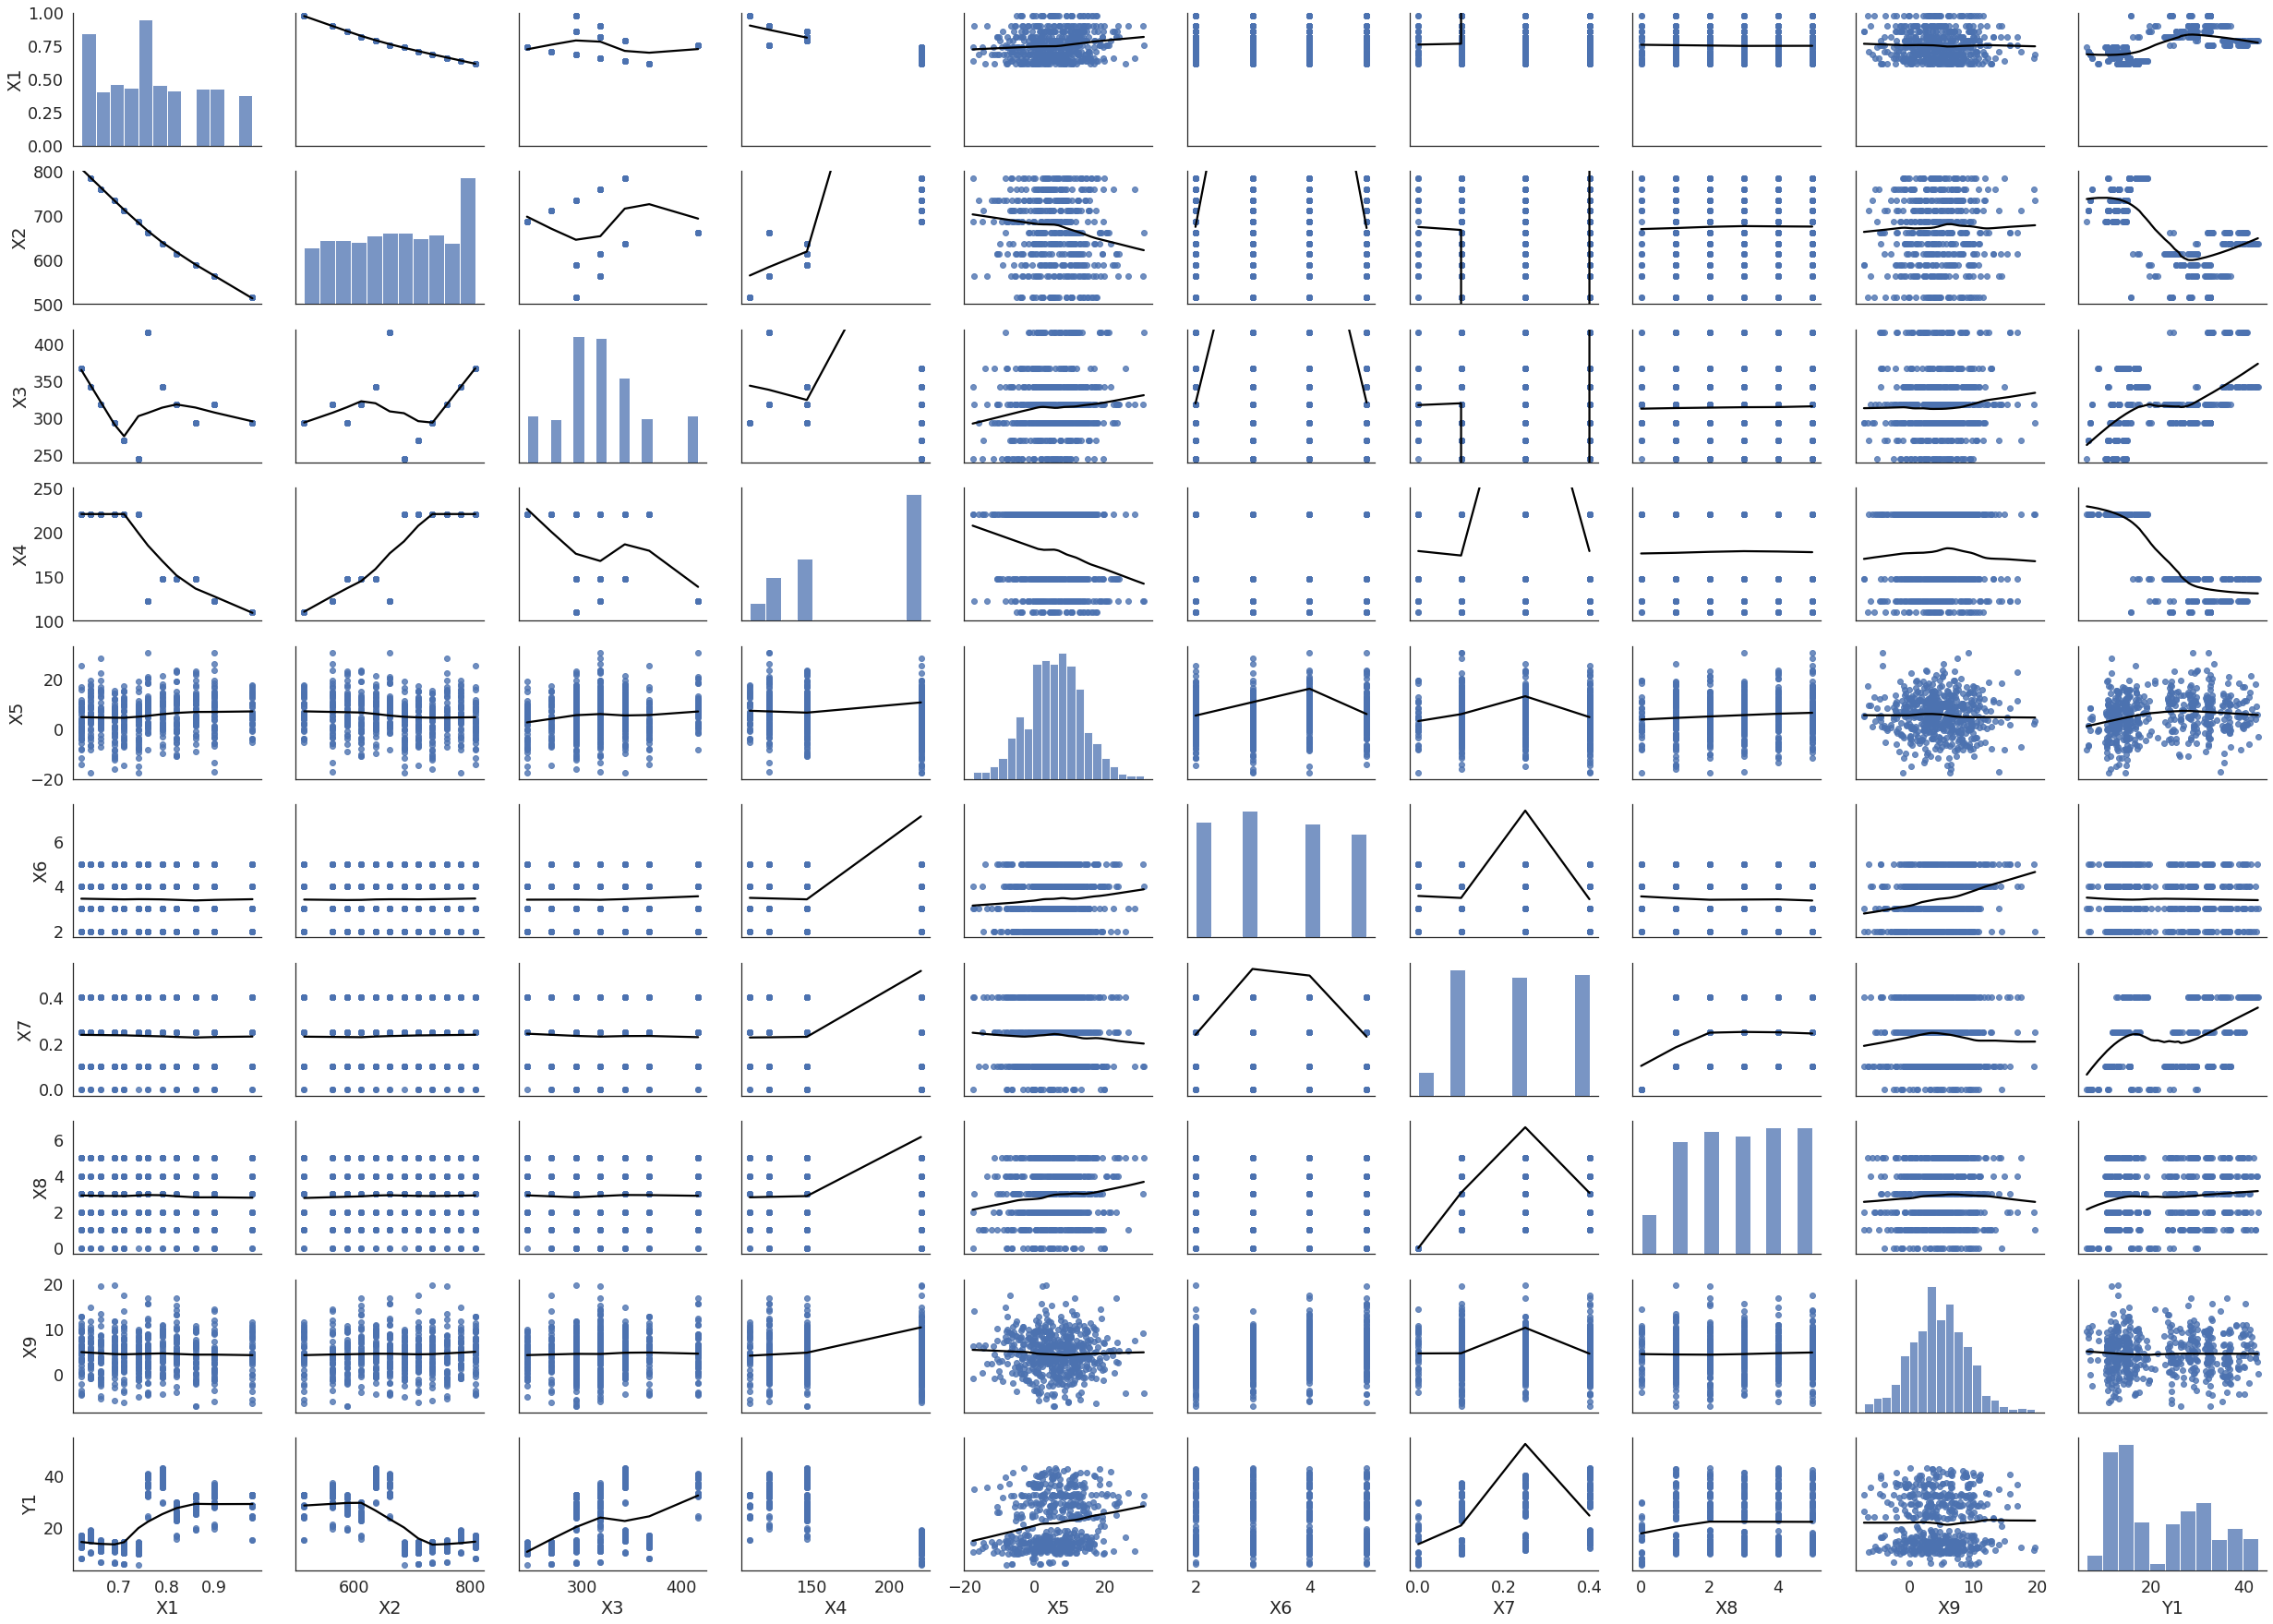

In [ ]:
sns.set(style='white', font_scale=1.6)
g = sns.PairGrid(df, aspect=1.4, diag_sharey=False)
g.axes[0,0].set_ylim((0,1))
g.axes[1,0].set_ylim((500,800))
g.axes[2,0].set_ylim((240,420))
g.axes[3,0].set_ylim((100,250))

g.map_lower(sns.regplot, lowess=True, ci=False, line_kws={'color': 'black'})
g.map_diag(sns.histplot, kde_kws={'color': 'black'})
g.map_upper(sns.regplot, lowess=True, ci=False, line_kws={'color': 'black'})
plt.show()

In [ ]:
df_initial = df.copy()

# Reset df

In [ ]:
df = df_initial.copy() # initialize

# Intervals (not good, do not run)

In [ ]:
# Try to set X1 into different intervals but the result is not good.

In [ ]:
def intervalize(datain, col, val):
  for i in datain[col].unique():
    if (i < val):
      datain[col] = datain[col].replace(i,0)
    else:
      datain[col] = datain[col].replace(i,1)

In [ ]:
intervalize(df, 'X1', 0.75)
intervalize(df, 'X2', 686)

# Data_process (discard X2, X5, X9)

In [ ]:
def process_data_frame(data_in):
    dataframe = data_in.copy()
    
    attributes_to_drop = ["X5", "X9", "X2"]
    dataframe.drop( attributes_to_drop,axis=1,inplace=True)
    return dataframe

In [ ]:
def get_features_and_target(dataframe,target="Y1"):
    label = dataframe[target].copy()
    features = dataframe.drop(target,axis=1).copy()
    return features, label

In [ ]:
df_processed = process_data_frame(df_initial)

In [ ]:
target = "Y1"
X, y = get_features_and_target(df_processed, target)

# Learn (Cross Validation)

In [ ]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.kernel_ridge import KernelRidge
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from collections import defaultdict
from sklearn.gaussian_process.kernels import RBF

kf = KFold(n_splits=5)

train_err = defaultdict(list)
crossval_err = defaultdict(list)
K = 1.0 * RBF(1.0)

candidate_models= {'Model 1': LinearRegression(), 'Model 2':Ridge(),\
                   'Model 3': KernelRidge(kernel='poly')}


for model_name, candidate_model in candidate_models.items():
    print("Model type:", candidate_model)
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        model = candidate_model.fit(X_train, y_train)

        predictions_training = model.predict(X_train)
        predictions = model.predict(X_test)

        rmse_training = np.sqrt(mean_squared_error(predictions_training,y_train))
        rmse = np.sqrt(mean_squared_error(predictions,y_test))
        print(rmse_training, rmse)
        
        train_err[model_name].append(rmse_training)
        crossval_err[model_name].append(rmse)


Model type: LinearRegression()
3.204855807825531 3.3795441357525227
3.289565933112211 3.001739174809185
3.2802416521510467 3.0597132194438643
3.1650582253398065 3.4936484224156072
3.1735099126951383 3.4502046288916532
Model type: Ridge()
3.6163154121582464 4.129385774047009
3.8232245904107973 3.2593297862527355
3.7680417637699457 3.5133273256548794
3.6589954211489344 3.9891447562031677
3.688696118314224 3.8460538173747656
Model type: KernelRidge(kernel='poly')
0.9765693186975761 0.9970201144387631


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:194: LinAlgWarning: Ill-conditioned matrix (rcond=2.69968e-17): result may not be accurate.
  dual_coef = linalg.solve(K, y, sym_pos=True, overwrite_a=False)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:194: LinAlgWarning: Ill-conditioned matrix (rcond=2.18991e-17): result may not be accurate.
  dual_coef = linalg.solve(K, y, sym_pos=True, overwrite_a=False)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:194: LinAlgWarning: Ill-conditioned matrix (rcond=2.38624e-17): result may not be accurate.
  dual_coef = linalg.solve(K, y, sym_pos=True, overwrite_a=False)


0.9520609690267363 1.2661301929584377
0.9626940592571075 1.0622563967263297
0.9848656508273194 0.9583578271270684
0.9470716872470621 1.1233515764521775


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:194: LinAlgWarning: Ill-conditioned matrix (rcond=2.19607e-17): result may not be accurate.
  dual_coef = linalg.solve(K, y, sym_pos=True, overwrite_a=False)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:194: LinAlgWarning: Ill-conditioned matrix (rcond=2.67906e-17): result may not be accurate.
  dual_coef = linalg.solve(K, y, sym_pos=True, overwrite_a=False)


# Print

In [ ]:
for key in crossval_err.keys():
    print(f'Training error of {key}: {np.mean(train_err[key])}')
    print(f'Cross-val error of {key}: {np.mean(crossval_err[key])}')

Training error of Model 1: 3.222646306224747
Cross-val error of Model 1: 3.2769699162625665
Training error of Model 2: 3.7110546611604294
Cross-val error of Model 2: 3.747448291906511
Training error of Model 3: 0.9646523370111602
Cross-val error of Model 3: 1.0814232215405553


# Test Init (reset test data)

In [ ]:
test_set = pd.read_csv(r"2309_test_no_labels.csv", index_col=0)

In [ ]:
test_init = test_set.copy()

In [ ]:
test_set = test_init.copy()

# Para (not good, do not run)

In [ ]:
# intervalize(test_set, 'X1', 0.75)
# intervalize(test_set, 'X2', 686)

# Test

In [ ]:
processed_test_set = process_data_frame(test_set)

In [ ]:
best_model = KernelRidge(kernel='poly').fit(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:194: LinAlgWarning: Ill-conditioned matrix (rcond=1.58127e-17): result may not be accurate.
  dual_coef = linalg.solve(K, y, sym_pos=True, overwrite_a=False)


In [ ]:
prediction_test = best_model.predict(processed_test_set)

In [ ]:
processed_test_set['Y1']=prediction_test #adding the column to the test_set

In [ ]:
processed_test_set['Y1'].to_csv('predictions_test.csv',index_label='ID') # save CSV that can be dumped

# Result

In [ ]:
result = pd.read_csv(r"predictions_test.csv", index_col=0)
result

,Y1
ID,
597,12.845520
8,16.952332
625,24.090393
36,32.990967
452,13.979370
...,...
71,32.219696
106,23.008057
270,41.339050
